In [2]:
!pip install soynlp

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data/accident_df_ver2.csv')
# 중복 및 null 값 제거
data = data.drop_duplicates('body_prep', keep = 'first').reset_index(drop=True)
data = data.dropna().reset_index(drop=True)
bodys = [txt for id, txt in enumerate(data['body_prep'])]
title = [txt for id, txt in enumerate(data['title'])]

### NewsNounExtractor
* 뉴스데이터에서 좋은 성능을 내는 명사추출기

In [79]:
from soynlp.noun import NewsNounExtractor

noun_extractor = NewsNounExtractor(
    max_left_length=11,
    max_right_length=8,
    predictor_fnames=None,
    verbose=True
)

used default noun predictor; Sejong corpus based logistic predictor
/Users/yeonghyeon/opt/anaconda3/lib/python3.8/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment


In [80]:
nouns = noun_extractor.train_extract(bodys)

scan vocabulary ... 
done (Lset, Rset, Eojeol) = (225220, 126321, 116665)
predicting noun score was done                                        
before postprocessing 54581
_noun_scores_ 12572
checking hardrules ... done0 / 12572+(이)), NVsubE (사기(당)+했다) ... done
after postprocessing 8663
extracted 166 compounds from eojeolss ... 17000 / 17206

In [81]:
nouns

{'인정된다고': NewsNounScore(score=0, frequency=8, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '2시50분쯤': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '변호인도': NewsNounScore(score=0, frequency=7, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '코로나바이러스': NewsNounScore(score=0, frequency=502, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '고속단정': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '4층짜리': NewsNounScore(score=0, frequency=7, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '11시20분쯤': NewsNounScore(score=0, frequency=6, feature_proportion=0, eojeol_proportio

In [82]:
# score 점수에 따라서 분류
# 빈도수 * 명사점수 기준

sorted_nouns = sorted(nouns.items(), 
    key=lambda x:-x[1].frequency * x[1].score)

sorted_by_score = {}

for i, (word, score) in enumerate(sorted_nouns):
    if i % 5 == 0:
        print()    
    if score.score > 0.45:
        sorted_by_score[word] = score.score
        print('%6s (%.2f)' % (word, score.score), end='')


    지난 (1.00)   있다. (1.00)    혐의 (0.94)    수사 (0.94)   A씨는 (1.00)
    오후 (0.96)    오전 (0.97)    관련 (0.85)    사건 (0.66)   코로나 (0.70)
    신고 (0.86)    사고 (0.85)    발견 (0.99) 코로나19 (0.97)   지난달 (1.00)
    당시 (0.73)    검사 (0.89)   피해자 (0.73)    위반 (0.94)    현장 (0.92)
    여성 (0.65)    함께 (0.99)    이후 (0.96)    재판 (0.81)
    자신 (0.95)    선고 (0.95)    모두 (1.00)    인근 (0.94)
    상태 (0.78)    병원 (0.93)   확진자 (0.56)    사실 (0.63)    예정 (0.98)
    때문 (1.00)    해당 (0.98)    파악 (0.97)    과정 (0.96)    가능 (1.00)
    차량 (0.69)    추가 (1.00)    기소 (1.00)    남성 (0.64)
    변호 (0.89)    징역 (0.98)   감염증 (1.00) 감염증(코 (1.00)   마스크 (0.92)
    범죄 (0.79)    이상 (0.91)    집회 (0.90)    사이 (0.94)    처벌 (0.75)
    범행 (0.64)    최근 (1.00)감염증(코로나19) (0.95)    경우 (0.68)    방역 (0.77)
   뉴스1 (1.00)    조치 (0.91)    불법 (1.00)   아파트 (0.84)    시장 (0.58)
    치료 (0.98)    고발 (0.92)    고소 (0.96)    의혹 (0.75)    2명 (0.61)
    지역 (0.72)    휴대 (0.99)    화재 (0.81)    압수 (0.98)    사망 (0.58)
    뉴스 (0.79)    이번 (1.00)    판정 (0.53)    설

    등기 (1.00)    하수 (1.00)    갓갓 (0.54)   탈북자 (1.00)   금팔찌 (0.72)
  운전하다 (1.00)   "지난 (1.00)    업자 (0.69)    월세 (0.99) 사업설명회 (0.99)
    면적 (0.78)   지원자 (0.99)    진보 (0.94)  웅동학원 (0.66)신한금융투자 (0.99)
지방자치단체 (0.51)   운영진 (0.48)    세대 (0.77)  안전관리 (0.98)    ○○ (0.63)
 해양수산부 (0.54)    여당 (0.54)   표지석 (0.88)    며칠 (0.50) 정보통신망 (0.50)
 전북경찰청 (0.46)   포함) (0.92)    자살 (0.80)    고령 (0.50) 2020년 (0.58)
    공적 (0.83)    기지 (0.88)    용기 (0.88)   희생자 (0.73)    장모 (0.88)
    공문 (0.50)    “주 (0.50)   구상권 (0.50)    용역 (0.67)    한계 (0.97)
    날짜 (0.97) 관리사무소 (0.72)10시30분 (0.97)    상류 (0.91)   선수들 (0.72)
  시도했다 (0.48)  촉법소년 (0.58)   현관문 (0.72)   31명 (0.67)    자매 (0.64)
 호우주의보 (0.82)   연락처 (0.69)   전기차 (0.82)   속에서 (0.51)   해양수 (0.51)
    테러 (0.82)   선착장 (0.75)   43분 (0.95)    문서 (0.95)    지진 (0.90)
    6대 (0.85)   탈북민 (0.53)  밀입국자 (0.85)    환기 (0.95)    정면 (0.94)
   위험운 (1.00)    인접 (1.00)  55분쯤 (1.00)   6시쯤 (1.00)    갑작 (1.00)
 여성청소년 (1.00)  12시쯤 (1.00)    달간 (1.00)   형법상 (1.00)    각자 (1.00)
    ‘고 (1.

   성행위 (0.98) 112신고 (0.98)  “아파트 (0.53)특별재난지역 (0.86)   페트병 (0.86)
  70여명 (0.86)    목록 (0.86)   특공대 (0.98)    개요 (0.98)
    하역 (0.98)    마비 (0.98)   굴착기 (0.98)  하상도로 (0.98)   치료제 (0.98)
    "저 (0.46)    출시 (0.98)    펜스 (0.97)   54분 (0.97)   국세청 (0.68)
    여관 (0.68)  101명 (0.68)   주사기 (0.97) 서울·경기 (0.97)핀란드대사관저 (0.97)
    배신 (0.75)   5만원 (0.75)    청산 (0.75)    원금 (0.75)    균형 (0.75)
  교통안전 (0.75)    드릴 (0.75) 문화상품권 (0.75)   형평성 (0.75)    음악 (0.75)
   부유물 (0.75)   경찰력 (0.61)  강력범죄 (0.68)   아저씨 (0.67)    혁신 (0.75)
   뒷수갑 (0.56)    살기 (0.67)    촛불 (0.67)    조명 (0.67)    슬픔 (0.67)
   방어권 (0.67)   1개월 (0.67)다중이용시설 (0.48)    날씨 (0.67)    구보 (0.95)
   뒷부분 (0.83)   양계장 (0.83)   강남역 (0.83)   성인물 (0.83)   등산객 (0.83)
    여유 (0.83)  공사업체 (0.95)  구조작업 (0.60)    싸움 (0.47)단체화재보험 (0.73)
  나눔의집 (0.60)    “노 (0.55)   공연음 (0.55) 1시50분 (0.94)11시50분 (0.94)
11시30분 (0.94)   세종로 (0.94)  학원강사 (0.94)    만전 (0.50)심폐소생술(CPR) (0.50)
    검정 (0.50)    이득 (0.50)   초인종 (0.50)   낙동강 (0.50)   대다수 (0.73)
    연습 (0.66)    비

  인사이동 (0.83) 척수신경병 (0.83) 나이트클럽 (0.83)    행렬 (0.83)    교류 (0.83)
   "평소 (0.83)  유증상자 (0.47)    논리 (0.83)   의혹' (0.47)푸르메요양병원 (0.47)
   66명 (0.47)  확진자) (0.66)신용정보회사 (0.82)   상태’ (0.82)    벨트 (0.81)
  관제센터 (0.65) 야구방망이 (0.65)JW중외제약 (0.46)    가축 (0.46)  목포해경 (0.46)
 행정부시장 (0.46) 방위사업청 (0.46) 사회복지사 (0.46)    R호 (0.46)기초자치단체 (0.46)
B씨(43) (0.46)   이춘재 (0.46) 법원행정처 (0.46)  '장미' (0.46)   지출액 (0.80)
    비치 (0.46)전환사채(CB) (0.53)    책무 (0.63)  봉사활동 (0.63)    교섭 (0.63)
  심장질환 (0.63)  보호처분 (0.63)가족관계증명서 (0.63)유사수신행위 (0.77)    벽보 (0.76)
  저감장치 (0.51)    외식 (0.51)  조건만남 (0.50)  경기지역 (0.50) 2년6개월 (0.50)
  사기도박 (0.50)   “위험 (0.50)  공식입장 (0.50)  거제시장 (0.50)    매물 (0.60)
    음독 (0.60)공판준비기일 (0.60)   불쾌감 (0.60)1200만원 (0.60)    오보 (0.75)
   부당함 (0.60)  방역소독 (0.60)    오줌 (0.60)    깃발 (0.60)  야생버섯 (0.60)
    가책 (0.60)가족·동거인 (0.75)    남측 (0.75)    5% (0.75)
    요리 (0.75)    고비 (0.75) 유료회원들 (0.75)   원칙' (0.75)아르바이트생 (0.75)
    정년 (0.75)   급발진 (0.75)  특별점검 (0.75)   제자들 (0.75)   발버둥 (0.75)
  전략공천 (0.75)  보안직원

In [22]:
# import re

# nouns_list = {}

# def cleanText(readData):

#     for key, value in readData.items():
#         if len(re.findall('[-=+,#/\?:^$.@*\"“”※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》|0-9]', key)) == 0:
#             nouns_list[key] = value

#     return nouns_list
 
# nouns_list = cleanText(sorted_by_score)
# final_nouns_list = nouns_list

# from collections import Counter
# # 자주 등장하는 단어
# n = 50
# common_words = Counter(nouns_list.keys()).most_common(n)

# common_list = []
# for i in range(n):
#     common_list.append(common_words[i][0])
    
# final_nouns_list = {}

# def remove_common_word(readData):

#     for key, value in readData.items():
#         if key not in common_list:
#             final_nouns_list[key] = value

#     return final_nouns_list

# final_nouns_list = remove_common_word(nouns_list)
# final_nouns_list

In [23]:
#len(final_nouns_list)

6699

In [83]:
# tokenizer생성

from soynlp.tokenizer import LTokenizer
#tokenizer = LTokenizer(scores=final_nouns_list)
tokenizer = LTokenizer(scores=sorted_by_score)

tok_sent = []
for i in range (len(bodys)):
    sent = bodys[i]
    tok_sent.append(tokenizer.tokenize(sent))

In [84]:
tok_sent

[['2011년',
  '5월',
  '부터',
  '10년간',
  '극심한',
  '노사갈등을',
  '빚어온',
  '충남',
  '아산',
  '의',
  '유성기업',
  '이',
  '분쟁',
  '에',
  '마침표',
  '를',
  '찍었다.',
  '2011년',
  '5월',
  '24일',
  '유성기업',
  '아산',
  '공장에',
  '경찰이',
  '투입돼',
  '공장',
  '점거',
  '중인',
  '노조원들을',
  '연행하고',
  '있다.',
  '31일',
  '민주노총',
  '금속',
  '노조와',
  '충남도',
  '등에',
  '따르면',
  '유성기업',
  '노조는',
  '‘단체교섭',
  '잠정',
  '합의안',
  '’을',
  '조합원',
  '투표를',
  '거쳐',
  '87.5%의',
  '찬성',
  '으로',
  '가결했다.',
  '2011~2020년',
  '임금',
  '과',
  '단체',
  '협약,',
  '파업',
  '과정',
  '에서',
  '발생한',
  '고소',
  '·고발',
  '취하',
  '등을',
  '주요',
  '내용',
  '으로',
  '하는',
  '합의안',
  '에',
  '조합원들',
  '이',
  '동의해준',
  '것이다.',
  '합의안',
  '에는',
  '임단협을',
  '비롯해',
  '현장',
  '에',
  '설치',
  '된',
  '감시',
  '카메라',
  '철거',
  '와',
  '재발',
  '방지',
  '약속,',
  '쌍방',
  '(노사)',
  '유감',
  '표명,',
  '노조',
  '간',
  '차별',
  '금지',
  '등도',
  '포함',
  '됐다.',
  '노사는',
  '1월',
  '중순',
  '공식',
  '적인',
  '임단협',
  '조인식을',
  '갖기',
  '로',
  '했다.',
  '유성기업',
  '노조는',
  '“오늘',
  '합의와',
  '타결은',
 

In [85]:
noun_sent = []
for doc in tok_sent:
    nouns = [word for word in doc if word in sorted_by_score.keys()]
    noun_sent.append(nouns)

In [86]:
noun_sent

[['2011년',
  '5월',
  '10년간',
  '아산',
  '유성기업',
  '분쟁',
  '마침표',
  '2011년',
  '5월',
  '24일',
  '유성기업',
  '아산',
  '공장',
  '있다.',
  '31일',
  '민주노총',
  '금속',
  '유성기업',
  '합의안',
  '조합원',
  '찬성',
  '임금',
  '파업',
  '과정',
  '고소',
  '주요',
  '내용',
  '합의안',
  '조합원들',
  '합의안',
  '현장',
  '설치',
  '감시',
  '카메라',
  '철거',
  '재발',
  '방지',
  '쌍방',
  '유감',
  '차별',
  '금지',
  '포함',
  '1월',
  '중순',
  '공식',
  '갖기',
  '유성기업',
  '10년',
  '투쟁',
  '2021년',
  '마음',
  '회사',
  '유성기업',
  '2011년',
  '5월',
  '18일',
  '연속',
  '조항’',
  '불이행',
  '이유',
  '파업',
  '아산',
  '물론',
  '충북',
  '영동',
  '카드',
  '24일',
  '정부',
  '공권력',
  '농성',
  '강제',
  '해산',
  '이후',
  '고소',
  '과정',
  '폭력',
  '제2',
  '설립',
  '2018년',
  '11월',
  '조합원',
  '7명',
  '임원',
  '사건',
  '사건',
  '연루',
  '조합원',
  '실형',
  '선고',
  '유성기업',
  '배임',
  '횡령',
  '혐의',
  '지난',
  '9월',
  '법정',
  '수감',
  '10월',
  '교섭',
  '합의안',
  '찬성',
  '지난',
  '10월',
  '교섭',
  '재개',
  '유성기업',
  '목표',
  '의견',
  '실무',
  '대표',
  '교섭',
  '지난',
  '30일',
  '서명',
  '합의안',
  '전국',
  '관계자들',
  '지

In [87]:
corpus = [" ".join(doc) for doc in noun_sent]
corpus[:5]
# for doc in tok_sent:
#     if word in sorted_by_score:
#         print(word)
#         print(noun)
#     final.append

['2011년 5월 10년간 아산 유성기업 분쟁 마침표 2011년 5월 24일 유성기업 아산 공장 있다. 31일 민주노총 금속 유성기업 합의안 조합원 찬성 임금 파업 과정 고소 주요 내용 합의안 조합원들 합의안 현장 설치 감시 카메라 철거 재발 방지 쌍방 유감 차별 금지 포함 1월 중순 공식 갖기 유성기업 10년 투쟁 2021년 마음 회사 유성기업 2011년 5월 18일 연속 조항’ 불이행 이유 파업 아산 물론 충북 영동 카드 24일 정부 공권력 농성 강제 해산 이후 고소 과정 폭력 제2 설립 2018년 11월 조합원 7명 임원 사건 사건 연루 조합원 실형 선고 유성기업 배임 횡령 혐의 지난 9월 법정 수감 10월 교섭 합의안 찬성 지난 10월 교섭 재개 유성기업 목표 의견 실무 대표 교섭 지난 30일 서명 합의안 전국 관계자들 지난 8월 기자회견 배임 혐의 기소 유성기업 법정 선고 있다. 유성기업 오랜 갈등 직원 심리 지원 방침 유성기업 행정 지원 나서기 대표 자동 유성기업 진심 “그동안 불명 상징 기업 거듭',
 '영화 화살 정지 감독 제작 스태프 지원 횡령 혐의 넘겨졌다 31일 감독 영화 아우라픽처스 업무 횡령 일부 혐의 기소 의견 이달 8월 감독 아우라픽처스 업무 관리 법률 위반 혐의 고발 감독 2011년 영화 스태프 처우 개선 목적 화살 제작 아우라픽처스 지원 스태프 통장 프로듀서 계좌 횡령 2012년 제작 과정 일부 스태프 급여 제작 대표 계좌 방식 횡령 변호 감독 경우 업무 횡령 혐의 기소 사기 보조 관리 위반 불기소 의견 혐의 모두 불기소 업무 횡령 감독 한편 감독 전쟁 화살 사회적 이슈 영화',
 '아동 성범죄자 12일 오전 경기도 안산 안산준법지원센터 있다. 아동 성폭행 바깥 31일 안산준법지원센터 지난 12일 모습 직후 시간대 6시 9시 거주지 인근 마트 30여분간 사실 CCTV 경비초소 전자 관련기관 전담 보호 감시 감시 관련 안산준법지원센터 관찰 빈틈 이뤄지고 “주 불안 염려 시간대 CCTV 경비초소 설치 있다. 안산준법지원센터 전담 특

In [141]:
len(noun_sent)

2508

In [88]:
# Word Embedding
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize

# Extracting features from text files
count_vect = TfidfVectorizer(min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                            #  ngram_range=(1, 3),
                             max_features = 90000
                             )
tfidf_transformer = TfidfTransformer()

cnt_vector = count_vect.fit_transform(corpus)
tfidf_vector = tfidf_transformer.fit_transform(cnt_vector)
tfidf_vector.shape

(2508, 6643)

In [89]:
# Modeling
def dbscan(data, corpus_vector, eps, min_samples):
    """Function to form dbscan clusters and display them"""
#     eps = 0.005# how close points should be to each other to be considered a part of a cluster 
#     min_samples = 3# the minimum number of points to form a dense region  
#     dbscan = DBSCAN( eps=eps, min_samples=min_samples,metric = "cosine" ) 
#     dbscan_model = dbscan.fit(corpus_vector)
    
    # pca = PCA(n_components=10)
    # result = pca.fit_transform(corpus_vector)
    # print(result.shape)
    from sklearn.cluster import DBSCAN
    from collections import Counter
    
    db = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_model = db.fit(corpus_vector)
    #Forming the clusters

    core_samples_mask = np.zeros_like(dbscan_model.labels_, dtype=bool)
    core_samples_mask[dbscan_model.core_sample_indices_] = True
    labels1 = dbscan_model.labels_
    n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0) # Number of clusters in labels
    # print(labels1)
    print('news documents:      {}'.format(len(labels1)))
    print('not clustering docs: {}'.format(Counter(labels1==-1)[1]))
    print('number of clusters:  {}'.format(n_clusters_)) # number of clusters
    
    clusters = {} # a dictionary for different cluster 
    for c, i in enumerate(labels1):
        if i == -1:
            continue
        elif i in clusters:
            clusters[i].append(data[c])
            # print(c, clusters[i])
        else:
            clusters[i] = [data[c]]
            # print(c, clusters[i])
    return clusters, labels1

In [174]:
clusters, labels = dbscan(data['title'], tfidf_vector, eps=1.124, min_samples=5)
data['labels']=labels

news documents:      2508
not clustering docs: 1631
number of clusters:  68


In [175]:
for c in clusters:
    print("Cluster No."+" "+str(c)+" 문서수: "+str(len(clusters[c])))
    for news in clusters[c]:
        print(news)
    print()

Cluster No. 0 문서수: 136
풀려난 전광훈 "민주당은 천만만콩떡···대한민국이 이겼다"
천안서 또 외국인 무더기 감염…첫 확진 열흘만에 100명 넘어
"보름간 517명 확진"…충남, 외국인·교회 감염 속출
법원, ‘라임 로비' 의혹 윤갑근 전 고검장 "구속 정당하다"
‘라임’ 연루 윤갑근 영장 청구···여권은 진척 없고 야권은 구속?
김봉현 “보석 탄원서 써주면 8억 갚겠다”…피해자들은 "황당"
[단독]라임 돈 271억 들어간 오피스텔, 분양대금 환수 가능할까
“보석 해주면 피해 복구하겠다"는 김봉현…9년 전에도 약속 안지켜
[단독]김봉현 '깨복친구' 전 靑행정관 "檢접대 술자리 안갔다"
아산 아파트 건설현장서 20대 4명 코로나19 확진
라임 김봉현 풀려날까…로비 폭로 흔들리고, 檢 강공 '악재'
‘전국 2500명 참가’ 집회 예고에 당진 “확진자 발생시 책임 물을 것”
[속보] 檢, '특정정당 지지' 전광훈에 징역 2년6개월 구형
12일만에 43명 감염…끊길 듯 끊기지 않는 '천안 콜센터' 확진자
혐의 14개, 피해액 1000억 넘는데…전자 보석 신청한 김봉현
14일 민중대회·정부규탄 도심집회…경찰 "불법땐 엄정대응"
개천절 집회 전 차벽부터 쌓더니…10만 진보집회 침묵하는 정부
[단독] 김영홍, 김봉현 상대 소송···'라임 몸통'들 진흙탕 싸움
[단독] "김봉현 더 센 것 있다…주가조작 귀띔, 정관계 거액 차익"
[단독]진짜 라임 '전주(錢主)'는?…檢, 김영홍 수상한 돈 수사
부실 자산 투자한 라임자산운용이 수익률 유지한 비결은
檢, 野 정치인 압수수색…라임의 우리은행 로비 의혹 정조준
천안 콜센터 20명 무더기 확진…“감염경로 확인 중”
檢, '김봉현 로비 의혹' 야당정치인·우리금융그룹 압수수색
라임 돈 캄보디아로 빼돌린 코스닥 임원진 횡령 혐의로 재판중
천안 포차ㆍ사우나 집단감염 확산…5명 추가 확진
[단독]사라진 투자금 1250억…"라임, 해외 3국으로 빼돌렸다"
檢, 라임 자금 흐름 추적 위해 KB증권 세번째 압수수색
김봉현, 檢 2

In [200]:
db_param_options = [[1.087,5],[1.088,5],[1.0885,5],[1.89,3],[1.895,5]]
for ep,min_sample in db_param_options:
    clusters, labels  = dbscan(data['title'], tfidf_vector, eps=ep, min_samples=min_sample )
    for c in clusters:
        print("Cluster No."+" "+str(c)+" 문서수: "+str(len(clusters[c])))

news documents:      2508
not clustering docs: 1605
number of clusters:  66
Cluster No. 29 문서수: 6
Cluster No. 0 문서수: 92
Cluster No. 3 문서수: 14
Cluster No. 1 문서수: 10
Cluster No. 2 문서수: 93
Cluster No. 5 문서수: 12
Cluster No. 9 문서수: 12
Cluster No. 17 문서수: 13
Cluster No. 10 문서수: 12
Cluster No. 4 문서수: 10
Cluster No. 6 문서수: 48
Cluster No. 7 문서수: 25
Cluster No. 8 문서수: 24
Cluster No. 11 문서수: 7
Cluster No. 14 문서수: 9
Cluster No. 45 문서수: 7
Cluster No. 12 문서수: 13
Cluster No. 13 문서수: 15
Cluster No. 26 문서수: 60
Cluster No. 15 문서수: 6
Cluster No. 16 문서수: 8
Cluster No. 62 문서수: 5
Cluster No. 18 문서수: 5
Cluster No. 34 문서수: 6
Cluster No. 63 문서수: 5
Cluster No. 19 문서수: 15
Cluster No. 20 문서수: 7
Cluster No. 21 문서수: 10
Cluster No. 22 문서수: 5
Cluster No. 23 문서수: 6
Cluster No. 24 문서수: 6
Cluster No. 25 문서수: 18
Cluster No. 52 문서수: 5
Cluster No. 44 문서수: 7
Cluster No. 46 문서수: 11
Cluster No. 27 문서수: 16
Cluster No. 28 문서수: 5
Cluster No. 32 문서수: 9
Cluster No. 33 문서수: 10
Cluster No. 41 문서수: 32
Cluster No. 30 문서수: 7
Cluster No

[0]


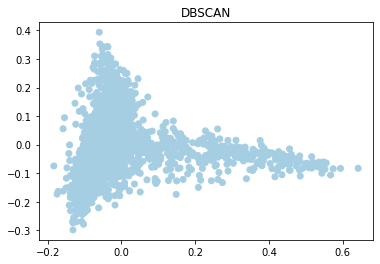

In [146]:
def plot_dbscan(X , eps, min_samples):
    import matplotlib.pyplot as plt
    %matplotlib inline
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from sklearn.decomposition import PCA
    from sklearn.cluster import DBSCAN
    """Function to plot clusters"""
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    # print(result.shape)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(result)
    y_pred = db.fit_predict(result)
    plt.scatter(result[:,0], result[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    print(np.unique(y_pred))
    
plot_dbscan(tfidf_vector.toarray(), 1.086, 3)